In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [306]:
data=pd.read_excel('25.xlsx')
data['a']/=100
data['t']/=25


In [387]:
g=(4*np.pi**2*(data['a']**2+1/12)/(data['t']*data['t']*data['a']))
ga=np.average(g)
sigsg=np.sqrt(np.sum((g-ga)**2)/(g.shape[0]-1))
sigstg=np.sum(np.sqrt((2*(0.16/25)*g/data['t'])**2+
              ((4*np.pi**2/(data['t']*data['t'])-(np.pi**2/3)/(data['t']*data['t']*data['a']**2))*0.001)**2))/(data['a'].shape[0])
print(sigstg,sigsg)
sigg=np.sqrt(sigstg**2+sigsg**2)
sigg

0.09060324089613928 0.04823016999280887


np.float64(0.10264061846276593)

In [346]:
X=data['a']*data['a']
Y=data['t']*data['t']*data['a']
xerr=2*(0.001/data['a'])
yerr=np.sqrt((0.001/data['a'])**2+4*((0.16/25)/data['t'])**2)
datao=pd.DataFrame({'$T^{2}a$':Y,'$a^2$':X})
datao

,$T^{2}a$,$a^2$
29,0.348480,0.0025
28,0.346792,0.0025
9,0.377914,0.0100
10,0.377914,0.0100
8,0.377401,0.0100
7,0.426491,0.0225
5,0.424369,0.0225
6,0.426389,0.0225
4,0.498017,0.0400
1,0.500216,0.0400


In [347]:
yerr

29    0.020579
28    0.020582
9     0.011973
10    0.011973
8     0.011976
7     0.010103
5     0.010117
6     0.010104
4     0.009529
1     0.009514
2     0.009542
0     0.009542
3     0.009553
13    0.009261
12    0.009236
11    0.009207
14    0.009244
15    0.009022
16    0.009038
17    0.009057
18    0.009032
21    0.008810
20    0.008771
19    0.008810
23    0.008572
22    0.008572
24    0.008572
25    0.008316
27    0.008309
26    0.008303
dtype: float64

In [359]:
#y=ax+b
def av(n):
    return np.average(n)
k=(av(X*Y)-av(X)*av(Y))/(av(X*X)-av(X)**2)
b=av(Y)-k*av(X)

stX=av(X*xerr)/np.sqrt(X.shape[0])
stY=av(Y*yerr)/np.sqrt(X.shape[0])

sigsk=np.sqrt((av(Y*Y)-av(Y)*av(Y))/(av(X*X)-av(X)**2) - k*k)/np.sqrt(X.shape[0])
sigsb=sigk*np.sqrt(av(X*X)-av(X)**2)

In [360]:
sigk=np.sqrt(sigsk**2+(stY/av(X))**2+(stX*(av(Y)-b)/(av(X)**2))**2)
sigb=np.sqrt(sigsb**2+(stY)**2+(k*stX)**2)
print(sigsk,sigsb)
print(sigk,sigb)

0.008216221728370662 0.0020785564994446025
0.017263140365837266 0.0023991612730008462


In [361]:
k,b

(np.float64(4.004488728100655), np.float64(0.33735496628472333))

In [362]:
sigk,sigb

(np.float64(0.017263140365837266), np.float64(0.0023991612730008462))

In [363]:
sigk/k*100,sigb/b*100

(np.float64(0.43109474237489603), np.float64(0.711168209385714))

In [364]:
4*np.pi**2/k, (4*np.pi**2*sigk/k)/k

(np.float64(9.858541323222104), np.float64(0.042499653319267))

In [365]:
np.sqrt(12*b/k), np.sqrt(12*b/k)*np.sqrt((sigb/b)**2+(sigk/k)**2)

(np.float64(1.005450372158422), np.float64(0.008361593331746327))

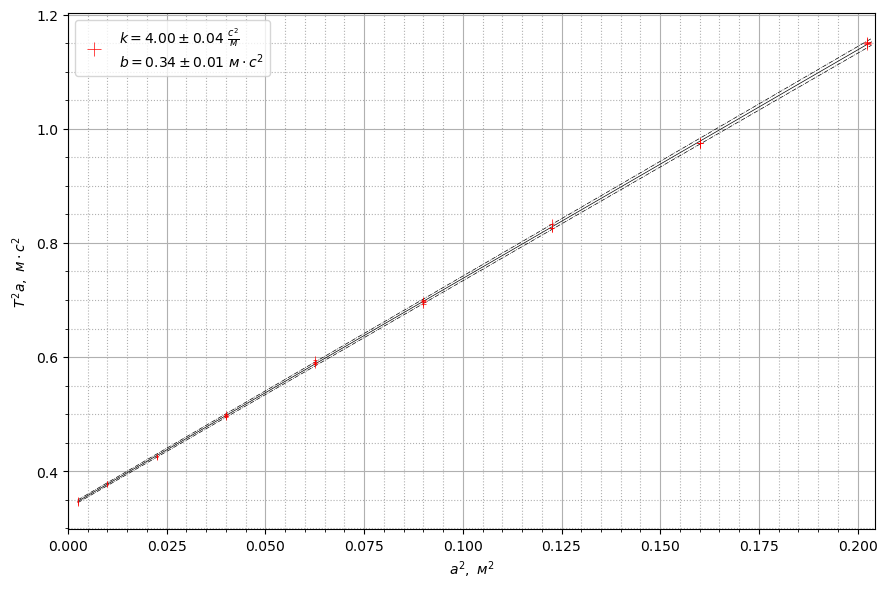

In [370]:
fig,ax = plt.subplots(figsize=(9,6))

ax.set_xlim(0,np.max(X)*1.01)
#ax.set_ylim(np.min(Y)/1.1,np.max(Y)*1.1)
ax.set_ylabel("$T^{2}a,~м\cdot c^2$")
ax.set_xlabel("$a^2,~м^2$")
ax.minorticks_on()
lb=r"$k = 4.00\pm 0.04 ~\frac{c^2}{м}$"+'\n'+r'$b = 0.34\pm 0.01 ~м\cdot c^2$'
Xl=np.linspace(np.min(X),np.max(X)*1.005,10)
ax.plot(Xl,k*Xl+b,'black',linewidth=0.5)
ax.plot(Xl,(k+sigk)*Xl+(b+sigb),'-.',color='black',linewidth=0.5)
ax.plot(Xl,(k-sigk)*Xl+(b-sigb),'-.',color='black',linewidth=0.5)
ln=ax.errorbar(X,Y, xerr=np.array(X*xerr), yerr=np.array(Y*yerr), fmt='r.', label=lb,markersize=0.01,capsize=0.01, elinewidth=0.5)
ax.legend()
ax.grid(which='major')
ax.grid(which='minor', linestyle=':')
fig.tight_layout()
#fig.savefig('./imgs/graphic.png')

In [357]:
from scipy.optimize import curve_fit
data=data.sort_values(by=['a'])
def func(x,g):
    #print(x)
    return 2*np.pi*np.sqrt((1/12+x**2)/(g*x))

popt, pcov = curve_fit(func, data['a'],data['t'])
print(popt)

[9.78908269]


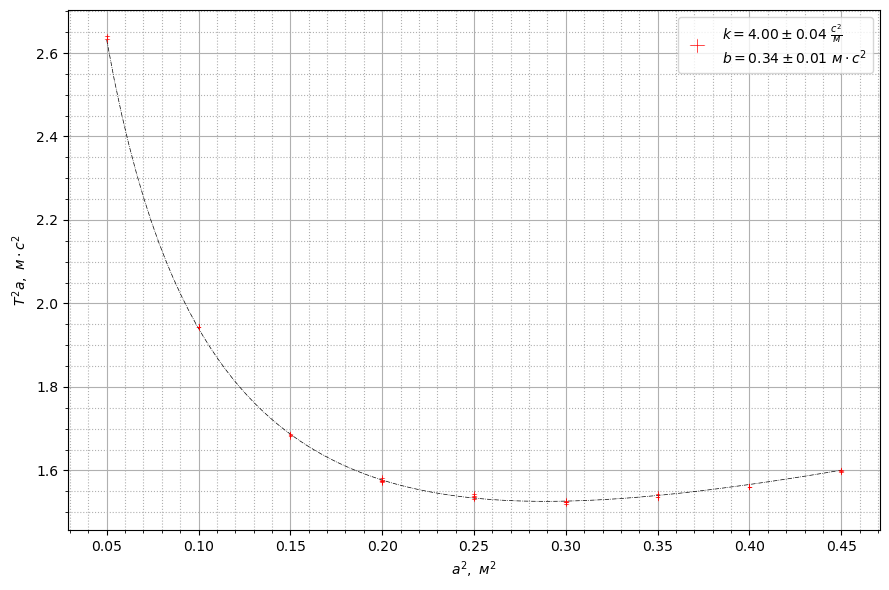

In [358]:
fig,ax = plt.subplots(figsize=(9,6))
#ax.set_xlim(0,np.max(X)*1.1)
#ax.set_ylim(np.min(Y)/1.1,np.max(Y)*1.1)
ax.set_ylabel("$T^{2}a,~м\cdot c^2$")
ax.set_xlabel("$a^2,~м^2$")
ax.minorticks_on()
lb=r"$k = 4.00\pm 0.04 ~\frac{c^2}{м}$"+'\n'+r'$b = 0.34\pm 0.01 ~м\cdot c^2$'
Xl=np.linspace(np.min(data['a']),np.max(data['a']),100)
#ax.plot(data['a'],data['t'],'black',linewidth=0.5)
ax.plot(Xl,func(Xl,popt),'-.',color='black',linewidth=0.5)
#ax.plot(Xl*,(k-sigk)*Xl+(b-sigb),'-.',color='black',linewidth=0.5)
ax.errorbar(data['a'],data['t'], xerr=0.001, yerr=0.16/25, fmt='r.', label=lb,markersize=0.1,capsize=0.1, elinewidth=0.5,linewidth=0.5)
ax.legend()
ax.grid(which='major')
ax.grid(which='minor', linestyle=':')
fig.tight_layout()

In [388]:
np.sqrt(1/12)

np.float64(0.28867513459481287)

In [267]:
print(lb)

$k = 4.00\pm 0.04 ~\frac{c^2}{м}$
$b = 0.34\pm 0.01 ~м\cdot c^2$


In [268]:
np.array(Y*yerr)

array([0.00473398, 0.00475883, 0.00473398, 0.0047244 , 0.00474547,
       0.00429339, 0.00430805, 0.00430878, 0.00451956, 0.00452478,
       0.00452478, 0.00548417, 0.00545885, 0.00543694, 0.00545211,
       0.00630935, 0.00629432, 0.00627743, 0.00629996, 0.0072745 ,
       0.0073143 , 0.0072745 , 0.00835669, 0.00835669, 0.00835669,
       0.00954701, 0.00956495, 0.00955726, 0.00713771, 0.00717148])

In [269]:
def err(x,y,k,b):
    return np.sum((k*x+b-y)**2)/x.shape[0]
def get_ap(x,y,steps=100, eps=1e-12, debug=False):
    k,b=0,0
    st=0
    while err(x,y,k,b)>eps and st!=steps:
        k=np.sum(y*x-x*b)/np.sum(x*x)
        b=np.sum(y-k*x)/x.shape[0]
        st+=1
        if debug:
            print(st,':',err(x,y,k,b))
    return k, b
a,b=get_ap(X,Y)
print(a,b)
print(4*np.pi**2/a)
print(np.sqrt(12*b/a))

4.0044887281006565 0.33735496628472333
9.8585413232221
1.0054503721584218
